In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_excel (r'Data_Train.xlsx')


In [118]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [119]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [120]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [121]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [122]:
df1 = df.drop(['Route','Dep_Time', 'Arrival_Time', 'Duration','Additional_Info'],axis=1)
df1.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,1 stop,13302


In [123]:
df1.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Total_Stops        object
Price               int64
dtype: object

In [124]:
df1['Date_of_Journey'] = pd.to_datetime(df1['Date_of_Journey'])
df1.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Total_Stops                object
Price                       int64
dtype: object

In [125]:
stat = df1['Airline'].value_counts()
stat

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [126]:
stat_less_than_20 = stat[stat<20]
stat_less_than_20

Multiple carriers Premium economy    13
Jet Airways Business                  6
Vistara Premium economy               3
Trujet                                1
Name: Airline, dtype: int64

In [127]:
df1['Airline'] = df1.Airline.apply(lambda x: 'other' if x in stat_less_than_20 else x)

In [128]:
df1['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
other                  23
Name: Airline, dtype: int64

In [129]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,1 stop,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,1 stop,13302


In [130]:
df2 = df1.copy()

In [131]:
df2['Total_Stops'] = df2['Total_Stops'].apply(lambda x: '0 stops' if x == 'non-stop' else x)
df2.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,0 stops,3897
1,Air India,2019-01-05,Kolkata,Banglore,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,1 stop,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,1 stop,13302


In [132]:
df2.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Total_Stops                object
Price                       int64
dtype: object

In [133]:
df2['Total_Stops'] = df2['Total_Stops'].astype(str)
df2['Stops_in_number'] = df2['Total_Stops'].apply(lambda x: float(x.split(' ')[0]))


In [134]:
df2['Stops_in_number'].dtype

dtype('float64')

In [135]:
df2 = df2.fillna(0)

In [136]:
df2['Stops_in_number'] = df2['Stops_in_number'].astype(int)

In [137]:
df3 = df2.drop(columns='Total_Stops')
df3.head()

,Airline,Date_of_Journey,Source,Destination,Price,Stops_in_number
0,IndiGo,2019-03-24,Banglore,New Delhi,3897,0
1,Air India,2019-01-05,Kolkata,Banglore,7662,2
2,Jet Airways,2019-09-06,Delhi,Cochin,13882,2
3,IndiGo,2019-12-05,Kolkata,Banglore,6218,1
4,IndiGo,2019-01-03,Banglore,New Delhi,13302,1


In [138]:
df4 = df3.copy()

In [139]:
df4['Date_of_Journey'] = df4['Date_of_Journey'].astype(str)

In [140]:
df4['Year'] = df4.Date_of_Journey.apply(lambda x: x.split('-')[0])
df4.head()

,Airline,Date_of_Journey,Source,Destination,Price,Stops_in_number,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,3897,0,2019
1,Air India,2019-01-05,Kolkata,Banglore,7662,2,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,13882,2,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,6218,1,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,13302,1,2019


In [141]:
df4['Month'] = df4.Date_of_Journey.apply(lambda x: x.split('-')[1])
df4.head()

,Airline,Date_of_Journey,Source,Destination,Price,Stops_in_number,Year,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,3897,0,2019,03
1,Air India,2019-01-05,Kolkata,Banglore,7662,2,2019,01
2,Jet Airways,2019-09-06,Delhi,Cochin,13882,2,2019,09
3,IndiGo,2019-12-05,Kolkata,Banglore,6218,1,2019,12
4,IndiGo,2019-01-03,Banglore,New Delhi,13302,1,2019,01


In [142]:
df4['Date'] = df4.Date_of_Journey.apply(lambda x: x.split('-')[2])
df4.head()

,Airline,Date_of_Journey,Source,Destination,Price,Stops_in_number,Year,Month,Date
0,IndiGo,2019-03-24,Banglore,New Delhi,3897,0,2019,03,24
1,Air India,2019-01-05,Kolkata,Banglore,7662,2,2019,01,05
2,Jet Airways,2019-09-06,Delhi,Cochin,13882,2,2019,09,06
3,IndiGo,2019-12-05,Kolkata,Banglore,6218,1,2019,12,05
4,IndiGo,2019-01-03,Banglore,New Delhi,13302,1,2019,01,03


In [143]:
df4.drop(columns='Date_of_Journey' , inplace=True)
df4.head()

,Airline,Source,Destination,Price,Stops_in_number,Year,Month,Date
0,IndiGo,Banglore,New Delhi,3897,0,2019,03,24
1,Air India,Kolkata,Banglore,7662,2,2019,01,05
2,Jet Airways,Delhi,Cochin,13882,2,2019,09,06
3,IndiGo,Kolkata,Banglore,6218,1,2019,12,05
4,IndiGo,Banglore,New Delhi,13302,1,2019,01,03


In [144]:
df4.columns

Index(['Airline', 'Source', 'Destination', 'Price', 'Stops_in_number', 'Year',
       'Month', 'Date'],
      dtype='object')

In [145]:
df4 = df4[['Airline', 'Source', 'Destination', 'Stops_in_number', 'Date','Month','Year','Price']]
df4.head()

,Airline,Source,Destination,Stops_in_number,Date,Month,Year,Price
0,IndiGo,Banglore,New Delhi,0,24,03,2019,3897
1,Air India,Kolkata,Banglore,2,05,01,2019,7662
2,Jet Airways,Delhi,Cochin,2,06,09,2019,13882
3,IndiGo,Kolkata,Banglore,1,05,12,2019,6218
4,IndiGo,Banglore,New Delhi,1,03,01,2019,13302


In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

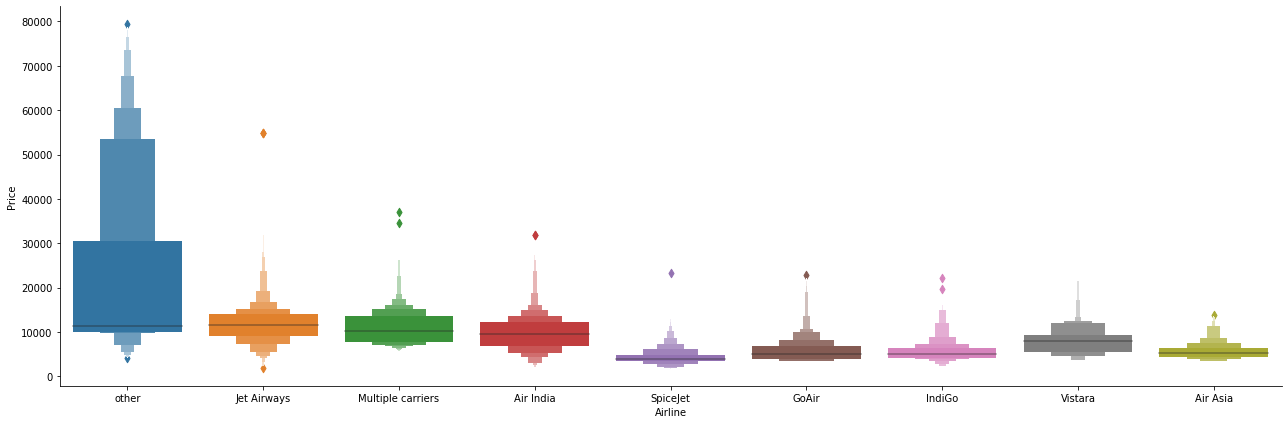

In [147]:

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df4.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [148]:
df4.head()

,Airline,Source,Destination,Stops_in_number,Date,Month,Year,Price
0,IndiGo,Banglore,New Delhi,0,24,03,2019,3897
1,Air India,Kolkata,Banglore,2,05,01,2019,7662
2,Jet Airways,Delhi,Cochin,2,06,09,2019,13882
3,IndiGo,Kolkata,Banglore,1,05,12,2019,6218
4,IndiGo,Banglore,New Delhi,1,03,01,2019,13302


In [149]:
df4.drop(columns='Price',inplace=True)

In [150]:
dummies_1 = pd.get_dummies(df4['Airline'])
dummies_1.head(3)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,other
0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0


In [151]:
dummies_1.drop(columns='other',inplace=True)
dummies_1.head(3)

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0


In [152]:
dummies_2 = pd.get_dummies(df4['Source'],drop_first=True)
dummies_2.head(3)

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0


In [153]:
dummies_3 = pd.get_dummies(df4['Destination'],drop_first=True)
dummies_3.head(3)

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0


In [154]:
df5 = pd.concat([df4,dummies_1],axis=1)
df5.head()

,Airline,Source,Destination,Stops_in_number,Date,Month,Year,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara
0,IndiGo,Banglore,New Delhi,0,24,03,2019,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,05,01,2019,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,06,09,2019,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,05,12,2019,0,0,0,1,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,03,01,2019,0,0,0,1,0,0,0,0


In [155]:
df5 = pd.concat([df5,dummies_2],axis=1)
df5.head()

,Airline,Source,Destination,Stops_in_number,Date,Month,Year,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai
0,IndiGo,Banglore,New Delhi,0,24,03,2019,0,0,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,2,05,01,2019,0,1,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,06,09,2019,0,0,0,0,1,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,05,12,2019,0,0,0,1,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,03,01,2019,0,0,0,1,0,0,0,0,0,0,0,0


In [156]:
df5 = pd.concat([df5,dummies_3],axis=1)
df5.head()

,Airline,Source,Destination,Stops_in_number,Date,Month,Year,Air Asia,Air India,GoAir,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,24,03,2019,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,05,01,2019,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,06,09,2019,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,05,12,2019,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,03,01,2019,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
df5 = df5.drop(['Airline','Source','Destination'],axis=1)
df5.head()

,Stops_in_number,Date,Month,Year,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,03,2019,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,05,01,2019,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,06,09,2019,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,1,05,12,2019,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,03,01,2019,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [158]:
df5.columns

Index(['Stops_in_number', 'Date', 'Month', 'Year', 'Air Asia', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi',
       'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [159]:
y = df3.Price
y.shape

(10683,)

In [160]:
X = df5.copy()
X.shape

(10683, 21)

In [161]:
X.dtypes

Stops_in_number       int32
Date                 object
Month                object
Year                 object
Air Asia              uint8
Air India             uint8
GoAir                 uint8
IndiGo                uint8
Jet Airways           uint8
Multiple carriers     uint8
SpiceJet              uint8
Vistara               uint8
Chennai               uint8
Delhi                 uint8
Kolkata               uint8
Mumbai                uint8
Cochin                uint8
Delhi                 uint8
Hyderabad             uint8
Kolkata               uint8
New Delhi             uint8
dtype: object

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [163]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5497381321451417

In [165]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\sufyan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1794805677.5092087, tolerance: 18186255.46061849
  positive)
C:\Users\sufyan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7298304035.100082, tolerance: 17870732.421511177
  positive)
C:\Users\sufyan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11380336479.356705, tolerance: 18232033.89243053
  positive)
C:\Users\sufyan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

,model,best_score,best_params
0,linear_regression,0.560805,{'normalize': False}
1,lasso,0.555772,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.767744,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [166]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\sufyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [167]:
y_pred = reg_rf.predict(X_test)

In [168]:

reg_rf.score(X_train, y_train)

0.8272894658164378

In [169]:
reg_rf.score(X_test, y_test)

0.7398125949842251

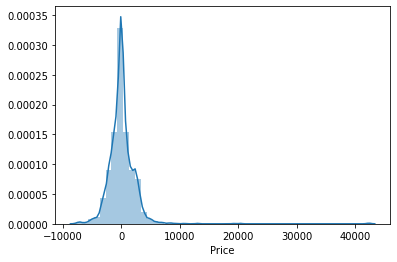

In [170]:
sns.distplot(y_test-y_pred)
plt.show()

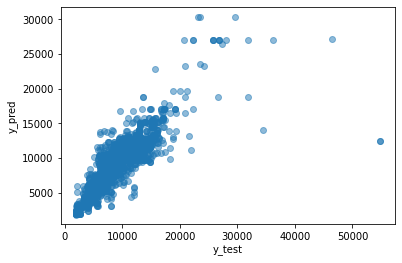

In [171]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [172]:

from sklearn import metrics

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1409.2867733550297
MSE: 5678813.834375729
RMSE: 2383.0261925492405


In [174]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [175]:
metrics.r2_score(y_test, y_pred)

0.7398125949842251

In [ ]:
fig , axs = plt.subplots()